<a href="https://colab.research.google.com/github/58191554/Linear_Regression_Pytorch/blob/main/Pytorch_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from time import time
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [ ]:
num_input = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_input, dtype=torch.float32)
labels = true_w[0]*features[:,0]+true_w[1]*features[:,1] + true_b
labels += torch.tensor(np.random.normal(0,0.01, size = labels.size()), dtype = torch.float32)

print(features)
print(labels.shape)

tensor([[-0.5529, -0.7483],
        [-0.4470, -1.9207],
        [ 0.0677,  0.1249],
        ...,
        [-1.0749,  0.7987],
        [-1.1508, -2.0758],
        [ 1.5347,  0.5193]])
torch.Size([1000])


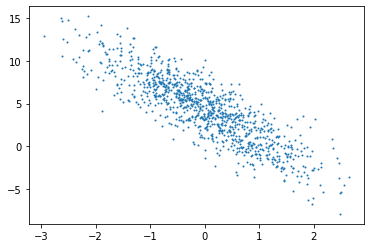

In [ ]:
plt.scatter(features[:,1].numpy(), labels.numpy(), 1);

In [ ]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
    yield features.index_select(0, j), labels.index_select(0, j)

In [ ]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
  print(X, y); break

tensor([[ 0.8243,  1.2173],
        [ 0.1092,  2.0794],
        [ 0.5569, -0.2395],
        [ 0.0432,  0.2299],
        [ 0.7769, -0.6255],
        [ 0.4196,  0.5435],
        [-1.1388, -0.7118],
        [-1.0420,  1.0120],
        [ 0.2756, -1.5603],
        [-0.3474, -0.9980]]) tensor([ 1.7073, -2.6503,  6.1247,  3.4998,  7.8853,  3.1993,  4.3314, -1.3335,
        10.0485,  6.8932])


In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_input, 1)), dtype = torch.float32)
b = torch.zeros(1, dtype = torch.float32)

w.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0.], requires_grad=True)

In [ ]:
def linreg(X, w, b):
  return torch.mm(X, w)+b

In [ ]:
def squared_loss(y_hat, y):
  return (y_hat-y.view(y_hat.size()))**2/2

In [ ]:
def sgd(params, lr, batch_size):
  for param in params:
    param.data -= lr*param.grad / batch_size


In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, features, labels):
    l = loss(net(X, w, b), y).sum()
    l.backward()
    sgd([w, b], lr, batch_size)
    
    w.grad.data.zero_()
    b.grad.data.zero_()

  train_l = loss(net(features, w, b), labels)
  print('epoch:', epoch+1, 'loss:', train_l.mean().item() )

epoch: 1 loss: 4.8494370275875553e-05
epoch: 2 loss: 4.7959445510059595e-05
epoch: 3 loss: 4.78860383736901e-05


In [ ]:
print(w, b)

tensor([[ 1.9999],
        [-3.4001]], requires_grad=True) tensor([4.1998], requires_grad=True)
